<a href="https://colab.research.google.com/github/jdelvalle74/haciendo_ciencia_proyecto_final/blob/main/Proyecto_Final_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Importo Librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras import layers
from tensorflow import keras
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, mean_squared_error, mean_absolute_error, precision_score, recall_score


In [2]:
#Leo el archivo con la información de precios de TSLA
ticker ="TSLA"
df_stock = pd.read_csv(ticker + '.csv')

print("Primeras filas del dataset:")
print(df_stock.head())

Primeras filas del dataset:
        Date  Open  High   Low  Close  Adj Close       Volume
0  29-Jun-10  1.27  1.67  1.17   1.59       1.59  281494500.0
1  30-Jun-10  1.72  2.03  1.55   1.59       1.59  257806500.0
2   1-Jul-10  1.67  1.73  1.35   1.46       1.46  123282000.0
3   2-Jul-10  1.53  1.54  1.25   1.28       1.28   77097000.0
4   6-Jul-10  1.33  1.33  1.06   1.07       1.07  103003500.0


In [3]:
#Shape del dataFrame
df_stock.shape

(3734, 7)

In [4]:
# Eliminando Nulos
df_stock.dropna(inplace=True)

In [5]:
#Nuevo shape del dataFrame
df_stock.shape

(3732, 7)

In [6]:
data = df_stock['Close'].values.reshape(-1, 1)

In [7]:
data

array([[  1.59],
       [  1.59],
       [  1.46],
       ...,
       [284.95],
       [285.88],
       [292.03]])

In [8]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

In [9]:
data_scaled

array([[-0.75771206],
       [-0.75771206],
       [-0.75887205],
       ...,
       [ 1.77072476],
       [ 1.77902321],
       [ 1.83389999]])

In [10]:
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

In [11]:
seq_length = 60
X, y = create_sequences(data_scaled, seq_length)

In [12]:
X

array([[[-0.75771206],
        [-0.75771206],
        [-0.75887205],
        ...,
        [-0.75940744],
        [-0.7595859 ],
        [-0.76012128]],

       [[-0.75771206],
        [-0.75887205],
        [-0.7604782 ],
        ...,
        [-0.7595859 ],
        [-0.76012128],
        [-0.76029974]],

       [[-0.75887205],
        [-0.7604782 ],
        [-0.76235205],
        ...,
        [-0.76012128],
        [-0.76029974],
        [-0.75994282]],

       ...,

       [[ 2.70006093],
        [ 2.79982068],
        [ 2.83836828],
        ...,
        [ 1.35151965],
        [ 1.46546706],
        [ 1.54372225]],

       [[ 2.79982068],
        [ 2.83836828],
        [ 2.65169797],
        ...,
        [ 1.46546706],
        [ 1.54372225],
        [ 1.77072476]],

       [[ 2.83836828],
        [ 2.65169797],
        [ 2.72781163],
        ...,
        [ 1.54372225],
        [ 1.77072476],
        [ 1.77902321]]])

In [13]:
y

array([[-0.76029974],
       [-0.75994282],
       [-0.75967513],
       ...,
       [ 1.77072476],
       [ 1.77902321],
       [ 1.83389999]])

In [14]:
#Datos de entrenamiento
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
#Construcción del modelo LSTM
model_lstm = keras.Sequential([
    layers.LSTM(50, return_sequences=True, input_shape=(seq_length, 1)),
    layers.LSTM(50),
    layers.Dense(1)
])
model_lstm.compile(optimizer='adam', loss='mse')

model_lstm.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 60, 50)         │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 30,651 (119.73 KB)

 Trainable params: 30,651 (119.73 KB)

 Non-trainable params: 0 (0.00 B)

<h1>Entrenamiento</h1>

In [16]:
history_lstm = model_lstm.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2, verbose=1)

Epoch 1/20
74/74 ━━━━━━━━━━━━━━━━━━━━ 9s 68ms/step - loss: 0.2852 - val_loss: 0.0229
Epoch 2/20
74/74 ━━━━━━━━━━━━━━━━━━━━ 4s 56ms/step - loss: 0.0140 - val_loss: 0.0128
Epoch 3/20
74/74 ━━━━━━━━━━━━━━━━━━━━ 6s 77ms/step - loss: 0.0113 - val_loss: 0.0105
Epoch 4/20
74/74 ━━━━━━━━━━━━━━━━━━━━ 9s 60ms/step - loss: 0.0096 - val_loss: 0.0120
Epoch 5/20
74/74 ━━━━━━━━━━━━━━━━━━━━ 6s 72ms/step - loss: 0.0071 - val_loss: 0.0080
Epoch 6/20
74/74 ━━━━━━━━━━━━━━━━━━━━ 10s 70ms/step - loss: 0.0070 - val_loss: 0.0072
Epoch 7/20
74/74 ━━━━━━━━━━━━━━━━━━━━ 9s 56ms/step - loss: 0.0067 - val_loss: 0.0062
Epoch 8/20
74/74 ━━━━━━━━━━━━━━━━━━━━ 6s 72ms/step - loss: 0.0058 - val_loss: 0.0058
Epoch 9/20
74/74 ━━━━━━━━━━━━━━━━━━━━ 4s 56ms/step - loss: 0.0046 - val_loss: 0.0060
Epoch 10/20
74/74 ━━━━━━━━━━━━━━━━━━━━ 5s 64ms/step - loss: 0.0048 - val_loss: 0.0066
Epoch 11/20
74/74 ━━━━━━━━━━━━━━━━━━━━ 5s 58ms/step - loss: 0.0050 - val_loss: 0.0061
Epoch 12/20
74/74 ━━━━━━━━━━━━━━━━━━━━ 4s 55ms/step - loss: 0.

<h1>Evalación</h1>

In [17]:
X_test

array([[[-0.59210016],
        [-0.59406323],
        [-0.60084475],
        ...,
        [-0.61226626],
        [-0.61262319],
        [-0.61342626]],

       [[ 0.94685911],
        [ 0.90402845],
        [ 0.97336058],
        ...,
        [ 1.35107349],
        [ 1.33983045],
        [ 1.33340585]],

       [[-0.64769079],
        [-0.6483154 ],
        [-0.64786925],
        ...,
        [-0.61976163],
        [-0.61601395],
        [-0.61637087]],

       ...,

       [[-0.74861054],
        [-0.74869977],
        [-0.749949  ],
        ...,
        [-0.71684447],
        [-0.71550601],
        [-0.71514909]],

       [[-0.63832158],
        [-0.63412775],
        [-0.63680466],
        ...,
        [-0.60691243],
        [-0.60405705],
        [-0.60619859]],

       [[-0.2939809 ],
        [-0.29647935],
        [-0.28791322],
        ...,
        [ 0.11148272],
        [ 0.11424886],
        [ 0.09229815]]])

In [18]:
# Evaluación
y_pred = model_lstm.predict(X_test)
y_pred = scaler.inverse_transform(y_pred)
y_test = scaler.inverse_transform(y_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step


In [19]:
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mae:.4f}")
print(f"MAPE: {mape:.4f}%")

MSE: 37.3639
RMSE: 6.1126
MAE: 3.4358
MAPE: 22.8715%


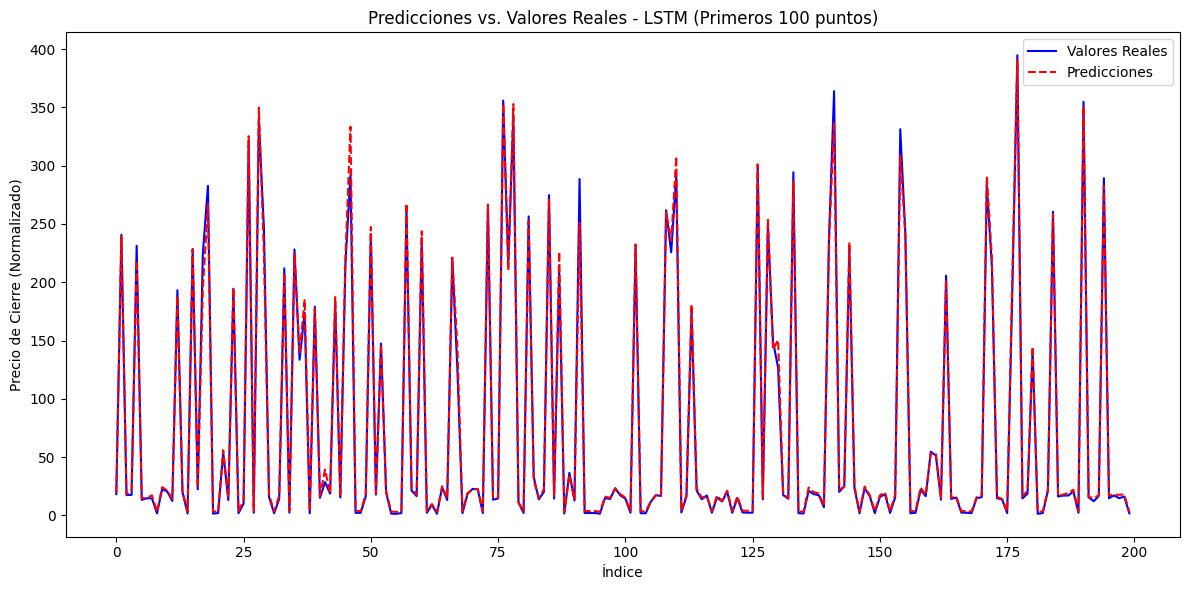

In [20]:
# Ejemplos de Predicciones para LSTM
# Seleccionamos un subconjunto de 100 puntos para visualizar
n_points = 200
plt.figure(figsize=(12, 6))
plt.plot(y_test[:n_points], label='Valores Reales', color='blue')
plt.plot(y_pred[:n_points], label='Predicciones', color='red', linestyle='--')
plt.title('Predicciones vs. Valores Reales - LSTM (Primeros 100 puntos)')
plt.xlabel('Índice')
plt.ylabel('Precio de Cierre (Normalizado)')
plt.legend()
plt.tight_layout()
plt.show()